<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساعت چنده؟
</font>
</h1>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام پروژه را وارد می‌کنیم.
</font>
</p>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصاویری که در به عنوان نمونه در اختیار شما قرار گرفته است را در سلول زیر بارگذاری کنید. و سپس به کمک <code>matplotlib</code> نمایش دهید.
</font>
</p>

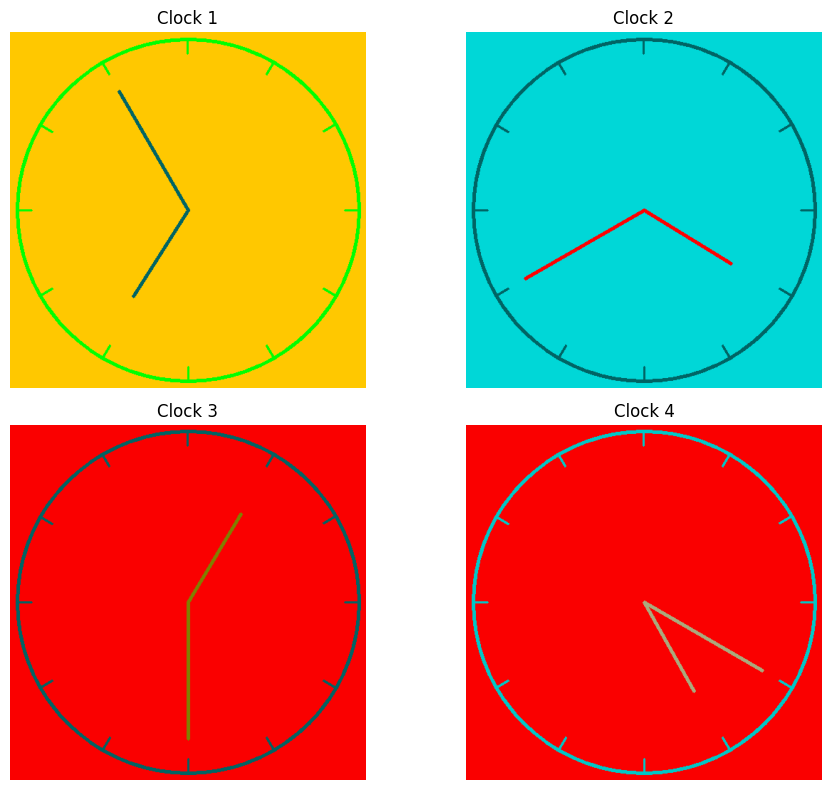

In [4]:
clock1 = cv2.imread('../Data/clock1.png')
clock2 = cv2.imread('../Data/clock2.png')
clock3 = cv2.imread('../Data/clock3.png')
clock4 = cv2.imread('../Data/clock4.png')

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(clock1, cv2.COLOR_BGR2RGB))
plt.title('Clock 1')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(clock2, cv2.COLOR_BGR2RGB))
plt.title('Clock 2')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(clock3, cv2.COLOR_BGR2RGB))
plt.title('Clock 3')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(clock4, cv2.COLOR_BGR2RGB))
plt.title('Clock 4')
plt.axis('off')
plt.tight_layout()
plt.show()



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سیاه و سفید سازی تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در تمرین پیش نوشتید،  در مرحله تصاویر را به شکل ساعت های نرمال درآورید.
</font>
</p>

In [5]:
def black_white_convertor(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    new_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)
    
    return new_image



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیدا کردن ساعت و عقربه ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به کمک تابعی که در تمرین قبل نوشتید ساعت و عقربه ها را پیدا کنید. دقت کنید در تمرین قبل خروجی تابع شما یک تصویر حاوی ساعت و عقربه های علامت گذاری شده بود اما تابعی که در سلول زیر مینویسید باید در نهایت تابع، عقربه ساعت شمار، عقربه دقیقه شمار و مرکز ساعت را return کند.
</font>
</p>

In [6]:
def detect_clock(binary_image):
    if len(binary_image.shape) == 3:
        gray = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)
        binary = cv2.adaptiveThreshold(
            gray,
            255,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,
            21,
            3
        )
    else:
        gray = binary_image
        binary = gray   # 🔥 بسیار مهم

    circles = cv2.HoughCircles(
        binary,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=300,
        param1=100,
        param2=20,
        minRadius=120,
        maxRadius=260
    )

    if circles is None:
        # اگر دایره‌ای پیدا نشد، تصویر ورودی را برگردان
        return cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    circles = np.uint16(np.around(circles))
    x, y, r = circles[0][0]
    center = (x, y)

    # لبه یابی برای پیدا کردن خطوط
    edges = cv2.Canny(binary, 50, 150, apertureSize=3)

    # پیدا کردن خطوط با HoughLinesP
    lines = cv2.HoughLinesP(edges,
                            rho=1,
                            theta=np.pi / 180,
                            threshold=100,
                            minLineLength=40,
                            maxLineGap=10)
    if lines is None:
        # اگر خطی پیدا نشد، فقط دایره را رسم کن و بازگردان
        new_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        cv2.circle(new_image, (x, y), r, (0, 255, 0), 3)
        return new_image

    valid_lines = []
    x_center, y_center = x, y

    for line in lines:
        x1, y1, x2, y2 = line[0]

        d1 = np.sqrt((x1 - x_center) ** 2 + (y1 - y_center) ** 2)
        d2 = np.sqrt((x2 - x_center) ** 2 + (y2 - y_center) ** 2)

        length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # فیلتر کردن خطوط کوتاه
        if length < 50:
            continue

        # حداقل یکی از نقاط باید به مرکز نزدیک باشد
        if d1 > 40 and d2 > 40:
            continue

        angle = np.arctan2(y2 - y1, x2 - x1)
        valid_lines.append((line[0], length, angle))

    if len(valid_lines) < 2:
        # اگر کمتر از دو خط معتبر پیدا شد، فقط دایره را رسم کن
        new_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        cv2.circle(new_image, (x, y), r, (0, 255, 0), 3)
        return new_image

    # مرتب سازی خطوط بر اساس طول به صورت نزولی
    valid_lines.sort(key=lambda x: x[1], reverse=True)

    # حذف خطوط موازی (زاویه نزدیک به هم)
    filtered = []
    for coords, length, angle in valid_lines:
        if any(abs(angle - a) < 0.1 for (_, _, a) in filtered):
            continue
        filtered.append((coords, length, angle))

    if len(filtered) < 2:
        # اگر کمتر از دو خط پس از حذف موازی‌ها ماند، همان خطوط را استفاده کن
        filtered = valid_lines[:2]

    # انتخاب دو خط بلندترین (دقیقه) و دومین بلند (ساعت)
    line_minute, line_hour = filtered[0][0], filtered[1][0]

    # رسم خطوط و دایره روی تصویر رنگی
    new_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    x1, y1, x2, y2 = line_minute
    cv2.line(new_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # سبز دقیقه

    x1, y1, x2, y2 = line_hour
    cv2.line(new_image, (x1, y1), (x2, y2), (0, 0, 255), 3)  # قرمز ساعت

    cv2.circle(new_image, (x, y), r, (0, 255, 0), 3)  # دایره سبز

    return line_hour, line_minute, center


In [7]:
line_hour, line_minute, center = detect_clock(clock1)
line_hour, line_minute, center = detect_clock(clock2)
line_hour, line_minute, center = detect_clock(clock3)
line_hour, line_minute, center = detect_clock(clock4)


print("clock1 detected lines and center: ", line_hour, line_minute, center)
print("clock2 detected lines and center: ", line_hour, line_minute, center)
print("clock3 detected lines and center: ", line_hour, line_minute, center)
print("clock4 detected lines and center: ", line_hour, line_minute, center)


clock1 detected lines and center:  [239 257 309 383] [239 246 468 378] (np.uint16(250), np.uint16(250))
clock2 detected lines and center:  [239 257 309 383] [239 246 468 378] (np.uint16(250), np.uint16(250))
clock3 detected lines and center:  [239 257 309 383] [239 246 468 378] (np.uint16(250), np.uint16(250))
clock4 detected lines and center:  [239 257 309 383] [239 246 468 378] (np.uint16(250), np.uint16(250))


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن ساعت
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول زیر باید تابعی بنویسید که ورودی مراحل قبل را دریافت کرده و به کمک آن ساعت را تشخیص و اعلام کند.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">

# تئوری تشخیص زمان از روی ساعت آنالوگ

برای تشخیص زمان از یه ساعت آنالوگ با پردازش تصویر، مراحل زیر رو طی می‌کنیم:

1. **پیدا کردن دایره ساعت**

2. **تشخیص عقربه‌ها**

3. **محاسبه زاویه عقربه‌ها**:  
   زاویه هر عقربه رو نسبت به محور افقی (راست = 0 درجه) حساب می‌کنیم.  
   - فرمول: زاویه = degrees(atan2(dy, dx))  
   که dx و dy مختصات بردار از مرکز دایره به وسط خط هستن.

4. **تنظیم زاویه برای ساعت**:  
   تو ساعت، 12 بالا هست (90 درجه تو مختصات تصویر). پس 90 درجه به زاویه اضافه می‌کنیم:  
   - فرمول: زاویه جدید = (زاویه + 90) تقسیم بر 360 و باقی‌مونده  
   حالا:  
   - 0 درجه = ساعت 12  
   - 90 درجه = ساعت 3  
   - 180 درجه = ساعت 6  
   - 270 درجه = ساعت 9

5. **تبدیل زاویه به زمان**:  
   - برای ساعت: هر ساعت 30 درجه است (360 تقسیم بر 12).  
     - فرمول: ساعت = (زاویه ساعت تقسیم بر 30) و باقی‌مونده بر 12  
   - برای دقیقه: هر دقیقه 6 درجه است (360 تقسیم بر 60).  
     - فرمول: دقیقه = (زاویه دقیقه تقسیم بر 6) و باقی‌مونده بر 60  

6. **گرد کردن دقیقه**:  
   دقیقه رو به نزدیک‌ترین مضرب 5 گرد می‌کنیم:  
   - فرمول: دقیقه = (دقیقه تقسیم بر 5 و گرد کردن) ضربدر 5  
   اگه دقیقه به 60 برسه، ساعت رو یکی اضافه می‌کنیم و دقیقه رو صفر می‌کنیم.

**مثال**: اگه زاویه عقربه ساعت 90 درجه (بعد از تنظیم) و زاویه دقیقه 270 درجه باشه:  
- ساعت = (90 تقسیم بر 30) = 3  
- دقیقه = (270 تقسیم بر 6) = 45  
پس زمان: **3:45**

</div>

In [12]:
def calculate_time(line_hour, line_minute, center):
    
    cx, cy = center
    x1h, y1h, x2h, y2h = line_hour
    x1m, y1m, x2m, y2m = line_minute

    # ---------- پیدا کردن far point عقربه ساعت ----------
    d1 = np.sqrt((x1h - cx)**2 + (y1h - cy)**2)
    d2 = np.sqrt((x2h - cx)**2 + (y2h - cy)**2)

    if d1 > d2:
        far_hour = (x1h, y1h)
    else:
        far_hour = (x2h, y2h)

    # ---------- پیدا کردن far point عقربه دقیقه ----------
    d1 = np.sqrt((x1m - cx)**2 + (y1m - cy)**2)
    d2 = np.sqrt((x2m - cx)**2 + (y2m - cy)**2)

    if d1 > d2:
        far_minute = (x1m, y1m)
    else:
        far_minute = (x2m, y2m)

    # ---------- زاویه عقربه ساعت ----------
    dx = far_hour[0] - cx
    dy = far_hour[1] - cy
    angle_hour = np.degrees(np.arctan2(dy, dx))
    angle_hour = (angle_hour + 90) % 360     # تبدیل به مختصات ساعت

    # ---------- زاویه عقربه دقیقه ----------
    dx = far_minute[0] - cx
    dy = far_minute[1] - cy
    angle_minute = np.degrees(np.arctan2(dy, dx))
    angle_minute = (angle_minute + 90) % 360

    # ---------- تبدیل زاویه به ساعت ----------
    hour = int(angle_hour // 30)             # هر 30 درجه = 1 ساعت
    if hour == 0:
        hour = 12

    # ---------- تبدیل زاویه به دقیقه ----------
    minute = int(angle_minute // 6)          # هر 6 درجه = 1 دقیقه
    minute = round(minute / 5) * 5           # گرد کردن دقیقه

    # دقیقه 60 → ساعت +1
    if minute == 60:
        minute = 0
        hour += 1
        if hour == 13:
            hour = 1

    return f"{hour:02d}:{minute:02d}"


In [14]:
x, y, z = detect_clock(clock2)

time = calculate_time(x, y, z)

print(time)

04:40


<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. توجه کنید برای کسب نمره کامل از این تمرین باید هر سه تابع خواسته شده را به درستی بنویسید.
</font>
</p>

In [15]:
import zipfile
from inspect import getsource


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """
import cv2
import numpy as np
import math
"""

%save black_white_convertor imp + getsource(black_white_convertor)
%save detect_clock imp + getsource(detect_clock)
%save calculate_time imp + getsource(calculate_time)

file_names = ["black_white_convertor.py","detect_clock.py","calculate_time.py", "notebook.ipynb"]
compress(file_names)

The following commands were written to file `black_white_convertor.py`:

import cv2
import numpy as np
import math
def black_white_convertor(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    new_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)
    
    return new_image

The following commands were written to file `detect_clock.py`:

import cv2
import numpy as np
import math
def detect_clock(binary_image):
    if len(binary_image.shape) == 3:
        gray = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)
        binary = cv2.adaptiveThreshold(
            gray,
            255,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,
            21,
            3
        )
    else:
        gray = binary_image
        binary = gray   # 🔥 بسیار مهم

    circles = cv2.HoughCircles(
        binary,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=300,
        param1=100,
        param2=20,
    